Using TensorFlow backend.
/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.156076). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 0s 173us/step - loss: 4616.3503 - val_loss: 351.2509
Epoch 2/1000
1500/1500 [==============================] - 0s 92us/step - loss: 254.9927 - val_loss: 243.5432
Epoch 3/1000
1500/1500 [==============================] - 0s 73us/step - loss: 197.3752 - val_loss: 175.6797
Epoch 4/1000
1500/1500 [==============================] - 0s 86us/step - loss: 146.2381 - val_loss: 149.9380

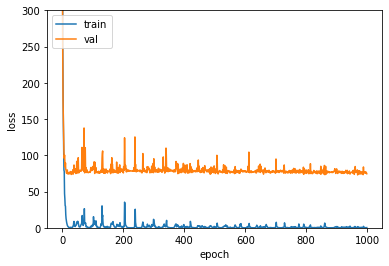

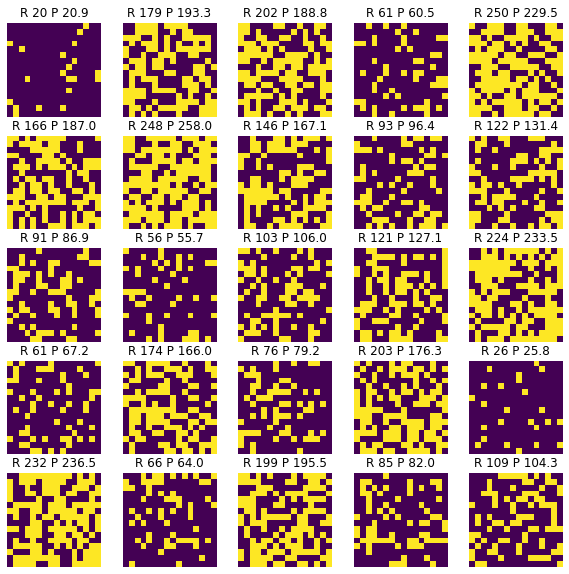

In [1]:
import Predictor
from keras.models import Sequential
from keras.layers import Dense

width = 16
height = 16

# 데이터셋 생성
x_train, y_train = Predictor.generate_dataset(1500)
x_val, y_val = Predictor.generate_dataset(300)
x_test, y_test = Predictor.generate_dataset(100)

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

# 모델 구성
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))

# 모델 학습
model.compile(loss='mse', optimizer='adam')

hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, validation_data=(x_val_1d, y_val))

# 학습 과정 출력
Predictor.show_model_learning_process(hist)

# 모델 평가
score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

# 모델 사용
yhat_test = model.predict(x_test_1d, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()